
|  |
| ------------------------------------------------------- | 
| ![Tremplin des sciences](images/tremplinColorSmall.png) | 

Cahier d'exercices pour l'enseignement et l'apprentissage de programmation issu de la collection "Climat et météo tremplin pour l'enseignement des sciences" (PIA IFÉ ENS de Lyon - Météofrance ENM Toulouse). Le dispositif clef en main repose sur l'utilisation d'une RaspberryPi chargée avec le système d'exploitation Debian enrichi, fourni par le projet. Les sources et les exécutables sont accessibles dans [l'espace collaboratif de la forge github](https://github.com/g-vidal/CahierDeProgrammes); plus d'information sur les [blogs d'accompagnement](http://blog.climatetmeteo.fr/GerardVidal/) systèmes d'exploitation sur [la page des OS  de Raspberries Pi](http://mediaserv.climatetmeteo.fr/images/RaspBerry/DebianStretchPi3/).  Toutes les ressources issues du projet sont fournies sous licence [Creative Commons](https://creativecommons.org/licenses/by-nc/4.0/) ou sous les licences libres d'origine des outils utilisés. Les ressources  du projet peuvent être utilisées dans tout autre environnement compatible.![licence : Creative Commons](images/Licence.jpg) 

Auteur : G. Vidal

------------------------------------------------------------

# Approche du changement climatique à Lyon : évolution des températures maximales et minimales

Ce cahier d'exercices utilise  les données collectées par le projet Tremplin sur la ville de Lyon et ses environs à partir du [projet DRIAS](http://www.drias-climat.fr/). les données de départ sont disponibles sur le [serveur de données climatologiques](http://geoloc-tremplin.ens-lyon.fr/climato-data/Lyon-1/tsmaxLyon-26-45-85.nc.info) du projet Tremplin des sciences. propose plusieurs voies d'exploration d'un jeu de données issues des simulations climatiques de Météofrance. 

ce cahier d'exercipropose une étude de l'évolution des températures moyennes du N années (N vaut 30 par défaut mais peut être modifié)  sur 4 noeuds centrés sur la ville de Lyon et l'ensemble des 100 noeuds de la région extraite. 

Le lot utilisé  est issu dess trois modélisation RCP 2.6 4.5 et 8.5 fournies par météofrance. Ce cahier manipule des données multidimensionnelles et doit être réservé à des étudiants avancés, si on souhaite l'utiliser en classe; toutefois, l'utilisation exclusive des parties de tracé des courbes et des cartes et d'un ausage facile et assez spontané. Le dessin des figures a été désactivé dans le dépôt sur la forge pour ne pas alourdir inutilement le fichier transféré.

## Préparation de l'environnement et ouverture du fichier de données

Importer d'abord le module `netcdf4` et `numpy`, attention les majuscules sont impératives pour le nom `netCDF4`. Ces deux modules permettent de traiter  les fichiers multidimensionnels au format netCDF utilisés dans le monde de la météorologie et de l'océanographie principalement.

In [62]:
import netCDF4 as nc
import numpy as np
from datetime import datetime
from array import array
import sys, datetime, os

Importation des données de températures depuis le fichier obtenu auprès du [serveur de données climatologiques](http://geoloc-tremplin.ens-lyon.fr/climato-data/Lyon-1/tsmaxLyon-26-45-85.nc.info) du projet Tremplin des sciences extrait du site [DRIAS](https://drias-prod.meteo.fr/okapi/accueil/okapiWebDrias/index.jsp) sur la région lyonnaise.

L'exemple utilisé ici a été réalisé avec une grille de 10 x 10 noeuds centrés sur la ville de Lyon, pour obtenir un jeu de données se reporter au manuel numérique réalisé par E. Le Jan et CArole Larose dans le cadre du projet "Climat et Météo Tremplin pour l'enseignement des sciences". Les instructions d'affichage commentées (pour la plupart) permettent de vérifier les propriétés  du fichier obtenu ainsi que les variables qui pourront être utilisées. Ces affichages sont facultatifs et peuvent être commentés sans conséquence pour la suite.

In [63]:
tMaxLyon = nc.Dataset('http://geoloc-tremplin.ens-lyon.fr/climato-data/Lyon-1/tmin-tmax-rstr_Lyon-26-45-85.nc')
print('Description des données issues du modèle : \n',tMaxLyon,'\n') 
print('Variables disponibles :',tMaxLyon.variables.keys()) # get all variable names
#print('Taille du tableau tasmax :',tMaxLyon.variables['tasmax'].shape ,'\n') 

Description des données issues du modèle : 
 <class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    title: Extrait TSMax par moyenne mensuelle de 2006 a 2100 Lyon et sa region
    institution: ENS de Lyon
    institute_id: IFE Institut Francais de l Education
    project_id: Climat et meteo tremplin pour l enseignement des sciences
    model_id: CNRM-ALADIN52
    product: output derived from Meteofrance DRIAS data
    contact: gerard.vidal@ens-lyon.fr
    creation_date: 2019-06-20 12:08:20.934175
    driving_experiment_name: DRIAS2014
    experiment: RCP2.6 RCP4.5 RCP8.5 
    model: ALADIN-Climat
    author: Gerard Vidal
    comment: Extraction des moyennes de la region Lyonnaise de 2006 a 2100 et changegement des variables
    dimensions(sizes): i(10), j(10), maxStrlen64(64), month(13), year(95)
    variables(dimensions): int32 i(i), int32 j(j), |S1 month(month,maxStrlen64), int32 year(year), float32 lat(j,i), float32 lon(j,i), int32 x(i), in

## Liste des dimensions et des variables du système de données

À partir de la liste des variables obtenue ci-dessus on renomme les jeux de données de chacune des variables qui seront exploitées apour effectuer les calculs et contrôle de la taille des échantillons. Les affichages proposés permettent de contrôler que les paramètres présents sont effectivement ceux qui sont attendus.

In [64]:
for dim in tMaxLyon.dimensions.items():
    print(dim)
print ('Variables \t  Forme \t\t Taille \t type :  \n')
for var in tMaxLyon.variables.keys() :
    print (var, '\t\t', 
           tMaxLyon.variables[var].dimensions, '\t\t', 
           tMaxLyon.variables[var].shape, '\t', 
           tMaxLyon.variables[var].dtype)


('i', <class 'netCDF4._netCDF4.Dimension'>: name = 'i', size = 10
)
('j', <class 'netCDF4._netCDF4.Dimension'>: name = 'j', size = 10
)
('maxStrlen64', <class 'netCDF4._netCDF4.Dimension'>: name = 'maxStrlen64', size = 64
)
('month', <class 'netCDF4._netCDF4.Dimension'>: name = 'month', size = 13
)
('year', <class 'netCDF4._netCDF4.Dimension'>: name = 'year', size = 95
)
Variables 	  Forme 		 Taille 	 type :  

i 		 ('i',) 		 (10,) 	 int32
j 		 ('j',) 		 (10,) 	 int32
month 		 ('month', 'maxStrlen64') 		 (13, 64) 	 |S1
year 		 ('year',) 		 (95,) 	 int32
lat 		 ('j', 'i') 		 (10, 10) 	 float32
lon 		 ('j', 'i') 		 (10, 10) 	 float32
x 		 ('i',) 		 (10,) 	 int32
y 		 ('j',) 		 (10,) 	 int32
tmax_26 		 ('year', 'month', 'j', 'i') 		 (95, 13, 10, 10) 	 float32
tmax_45 		 ('year', 'month', 'j', 'i') 		 (95, 13, 10, 10) 	 float32
tmax_85 		 ('year', 'month', 'j', 'i') 		 (95, 13, 10, 10) 	 float32
tmin_26 		 ('year', 'month', 'j', 'i') 		 (95, 13, 10, 10) 	 float32
tmin_45 		 ('year', 'month

## Création des tableaux de calcul

In [65]:
lyon_tmax26 = tMaxLyon.variables['tmax_26']  # variable temperature 
lyon_tmax45 = tMaxLyon.variables['tmax_45']  # variable temperature 
lyon_tmax85 = tMaxLyon.variables['tmax_85']  # variable temperature 
lyon_tmin26 = tMaxLyon.variables['tmin_26']  # variable temperature 
lyon_tmin45 = tMaxLyon.variables['tmin_45']  # variable temperature 
lyon_tmin85 = tMaxLyon.variables['tmin_85']  # variable temperature 
lyon_rstr26 = tMaxLyon.variables['rstr_26']  # variable temperature 
lyon_rstr45 = tMaxLyon.variables['rstr_45']  # variable temperature 
lyon_rstr85 = tMaxLyon.variables['rstr_85']  # variable temperature 
lyon_rstrc26 = tMaxLyon.variables['rstrc_26']  # variable temperature 
lyon_rstrc45 = tMaxLyon.variables['rstrc_45']  # variable temperature 
lyon_rstrc85 = tMaxLyon.variables['rstrc_85']  # variable temperature 
lyon_month = nc.chartostring(tMaxLyon.variables['month'][:])  # variable temps
lyon_year = tMaxLyon.variables['year']  # variable temps

#test = nc.chartostring(tMaxLyon.variables['month'][:])
#print(test)
#test[:] = nc.chartostring(tMaxLyon.variables['month'][:],encoding='utf-8')
#print(test)

lyon_lat,lyon_lon = tMaxLyon.variables['lat'][:,:], tMaxLyon.variables['lon']  # latitude longitude
lyon_x,lyon_y = tMaxLyon.variables['x'], tMaxLyon.variables['y']  # coordonnées métriques
lyon_gridi,lyon_gridj = tMaxLyon.variables['i'], tMaxLyon.variables['j'] # coordonnées grille Aladin

lenmonths = lyon_month.shape[0]

#print ('\n Taille des tableaux de calcul : \n', 
#       '\ntmax26 : ', lyon_tmax26.shape, lyon_tmax26[44,7,5,5],tMaxLyon.variables['temp_26'][44,7,5,5],
#       '\ntmax45 : ', lyon_tmax45.shape, lyon_tmax45[44,7,5,5],tMaxLyon.variables['temp_45'][44,7,5,5],
#       '\ntmax85 : ', lyon_tmax85.shape, lyon_tmax85[44,7,5,5],tMaxLyon.variables['temp_85'][44,7,5,5],
#       '\n\nyear : ', lyon_year.shape, lyon_year[:],
#       '\nmonth : ', lyon_month.shape, lyon_month[:],
#       '\n\nLat : ', lyon_lat.shape,  lyon_lat[0,:],
#       '\nLon : ', lyon_lon.shape, lyon_lon[0,:],
#       '\n\nX : ', lyon_x.shape, lyon_x[:],
#       '\nY : ', lyon_y.shape, lyon_y[:],
#       '\n\ni : ', lyon_gridi.shape, lyon_gridi[:],
#       '\nj : ', lyon_gridj.shape, lyon_gridj[:])

Définition et affectation des variables où sont copiées les données conservées et où seront stockés les résultats des calculs. (La syntaxe du fichier netCDF reste à  vérifier). Les années seront calculées pendant le calcul principal, les affichages permettent de vérifier la validité des données utilisées.









## Calcul principal des moyennes par mois pour chaque noeud et toutes les années


Le premier bloc de code permet de fixer les paramètres qui seront utilisés pour les calculs. les commentaires donnent des indications sur les valeurs possibles.

### Calculs pour une seule période de  `yearInterval` années

Calcul de la moyenne de températures d'une sélection de mois sur un intervalle de `yearInterval` années à partir de l'année `yearBegin` sur les noeuds allant de `(startj,starti)` de taille `(intervalj,intervali)`

#### préparation de la création de figures
On importe les bibliothèques plotly

In [66]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools

py.init_notebook_mode(connected=True)

### Calculs pour UNE SÉRIE DE  PÉRIODES de  `yearInterval` années

Calcul de la moyenne de températures des mois de `calcMonth` (il peut y en avoir un seul ou un choix), sur `yearInterval` années à partir de l'année `yearBegin` jusqu'à l'année `yearBegin + yearPeriod` sur les noeuds à partir de `(startj,starti)` de taille `(intervalj,intervali)`. La valeur touvée est affectée à la dernière année de la plage de calcul.

In [67]:
# Variables de calcul
# ASéquence d'années pendant lesquelles les calculs sont effectués
# Choix de l'année de départ  
# du nombre d'années sur lesquelles sont effectuées les moyennes
# Des mois choisis pour le calcul 0 = Jan; 7 = Aout
# yearbegin + yearperiod must be <= 2100
yearBegin = 2006
yearInterval = 30
yearPeriod = 94
calcMonth = [0,7,11] # Calcul effectué pour Janvier Aout et moyenne annuelle
lencalcMonths = len(calcMonth)
#  Grille i j
# sous espace de la grille 10X10 utilisé
#  le premier écantillon est un carré 2X2 au centre de la grille
# Le second échantillon est toute la grille entière
starti = 4
intervali = 2
startj = 4
intervalj = 2
#starti = 0
#intervali = 10
#startj = 0
#intervalj = 10
# Variables de calcul
startYear = yearBegin - 2006
endYear = startYear + yearInterval
#print(yearPeriodInterval)
endi = starti + intervali
endj = startj + intervalj
                          
if not  (startYear >= 0) and (endYear <= lenyears) :
    print('starting year or finishing year out of bounds')
    sys.exit('giving up on year bounds')
#print(gridj[loc_j])
#print(gridi[loc_i])
#print(startYear,':',endYear,',',calcMonth,',',startj,':',endj,',',starti,':',endi)
#print(temp.shape)
#print(np.mean(temp[startYear:endYear,calcMonth,startj:endj,starti:endi]))

### Calcul pour n mois sur p périodes de q années pour la zone

Calcul de la moyenne des températures mensuelles sur `yearInterval` ans pendant une période de `yearPeriod` années successives pour une sélection de `calcMonth`  mois.

In [68]:
moyMAreaInterval_26 = np.zeros((lencalcMonths,yearPeriod))
moyMAreaInterval_45 = np.zeros((lencalcMonths,yearPeriod))
moyMAreaInterval_85 = np.zeros((lencalcMonths,yearPeriod))
yearPeriodM = yearPeriod - yearInterval
# Tmax and (i,j) means are computed to localize the mean
for p in range(yearPeriodM) :
    a = startYear + p
    b = endYear + p    
    moyMAreaInterval_26[:,p] = np.mean(lyon_tmax26[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
    moyMAreaInterval_45[:,p] = np.mean(lyon_tmax45[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
    moyMAreaInterval_85[:,p] = np.mean(lyon_tmax85[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
firstPlotYear = startYear + yearInterval
lastPlotYear = firstPlotYear + yearPeriodM
data = [] * lencalcMonths
trace = [] * lencalcMonths

Le diagramme ci-dessous  représente l'évolution sur `yearPeriod` années de la température dans la région Lyonnaise.(Décommenter la dernière ligne du bloc pour afficher la figure)

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]



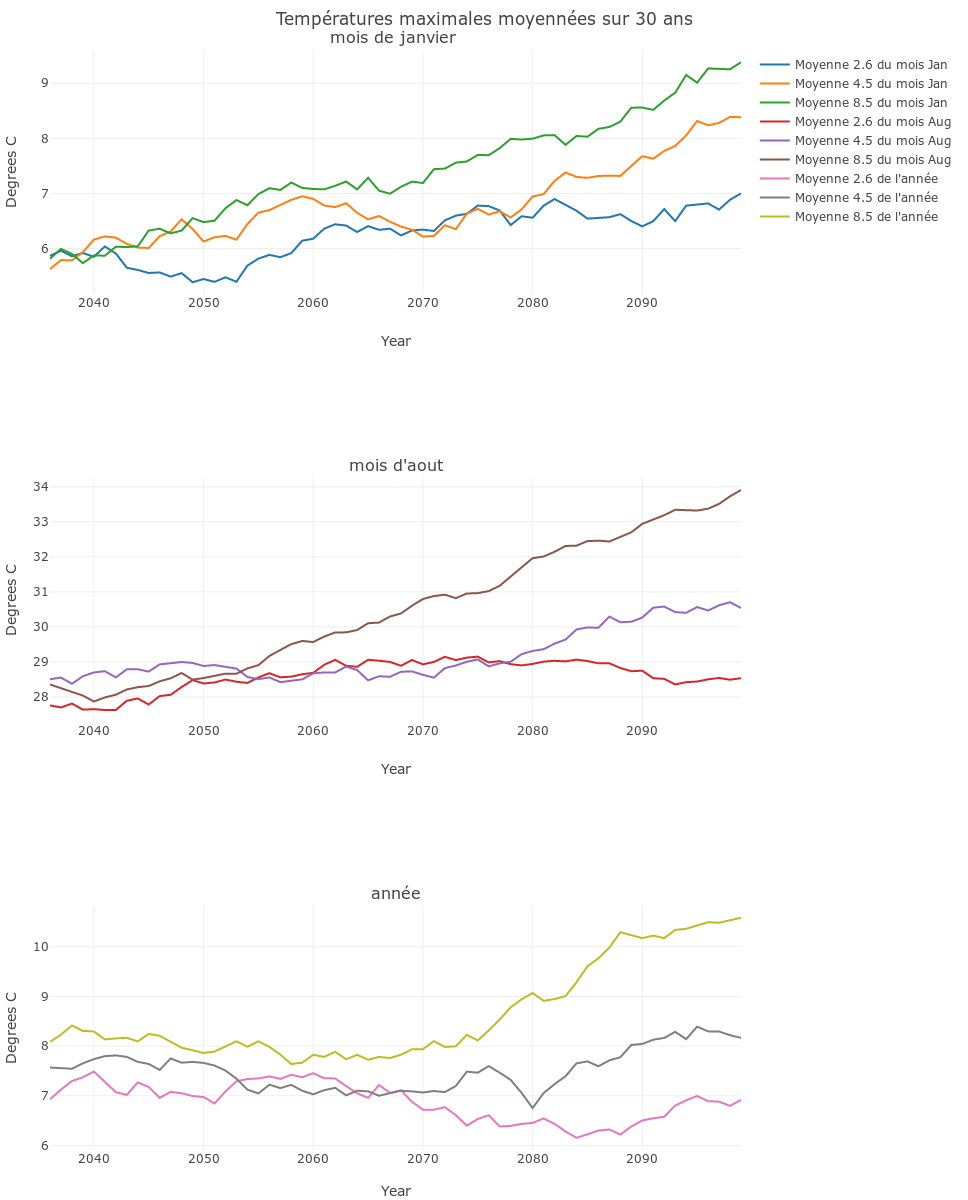

In [69]:
q = 0
trace26_0 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_26[q,:],
    name ='Moyenne 2.6 du mois %s'%lyon_month[calcMonth[q]]
)
trace45_0 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_45[q,:],
    name ='Moyenne 4.5 du mois %s'%lyon_month[calcMonth[q]]
)
trace85_0 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_85[q,:],
    name ='Moyenne 8.5 du mois %s'%lyon_month[calcMonth[q]]
)

q = 1
trace26_1 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_26[q,:],
    name ='Moyenne 2.6 du mois %s'%lyon_month[calcMonth[q]]
)
trace45_1 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_45[q,:],
    name ='Moyenne 4.5 du mois %s'%lyon_month[calcMonth[q]]
)

trace85_1 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_85[q,:],
    name ='Moyenne 8.5 du mois %s'%lyon_month[calcMonth[q]]
)

q = 2
trace26_2 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_26[q,:],
    name ="Moyenne 2.6 de l'année"
)
trace45_2 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_45[q,:],
    name ="Moyenne 4.5 de l'année"
)

trace85_2 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moyMAreaInterval_85[q,:],
    name ="Moyenne 8.5 de l'année"
)

fig = tools.make_subplots(rows=3, 
                          cols=1, 
                          subplot_titles=("mois de janvier ","mois d'aout","année"))

fig.append_trace(trace26_0, 1, 1)
fig.append_trace(trace45_0, 1, 1)
fig.append_trace(trace85_0, 1, 1)
fig.append_trace(trace26_1, 2, 1)
fig.append_trace(trace45_1, 2, 1)
fig.append_trace(trace85_1, 2, 1)
fig.append_trace(trace26_2, 3, 1)
fig.append_trace(trace45_2, 3, 1)
fig.append_trace(trace85_2, 3, 1)

fig['layout']['xaxis1'].update(title='Year')
fig['layout']['xaxis2'].update(title='Year')
fig['layout']['xaxis3'].update(title='Year')
fig['layout']['yaxis1'].update(title='Degrees C')
fig['layout']['yaxis2'].update(title='Degrees C')
fig['layout']['yaxis3'].update(title='Degrees C')
fig['layout']['margin'] = {'l': 50, 'r': 10, 'b': 50, 't': 50}
fig['layout'].update(autosize = False, height=1200, width=900, title='Températures maximales moyennées sur 30 ans\n')

py.iplot(fig, filename='basic-line')

In [70]:
moymAreaInterval_26 = np.zeros((lencalcMonths,yearPeriod))
moymAreaInterval_45 = np.zeros((lencalcMonths,yearPeriod))
moymAreaInterval_85 = np.zeros((lencalcMonths,yearPeriod))
yearPeriodm = yearPeriod - yearInterval
for p in range(yearPeriodm) :
    a = startYear + p
    b = endYear + p    
    moymAreaInterval_26[:,p] = np.mean(lyon_tmin26[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
    moymAreaInterval_45[:,p] = np.mean(lyon_tmin45[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
    moymAreaInterval_85[:,p] = np.mean(lyon_tmin85[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
#print(moyAreaInterval)
firstPlotYear = startYear + yearInterval
lastPlotYear = firstPlotYear + yearPeriodm
data = [] * lencalcMonths
trace = [] * lencalcMonths

Le diagramme ci-dessous  représente l'évolution sur `yearPeriod` années de la température dans la région Lyonnaise.(Décommenter la dernière ligne du bloc pour afficher la figure)

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]



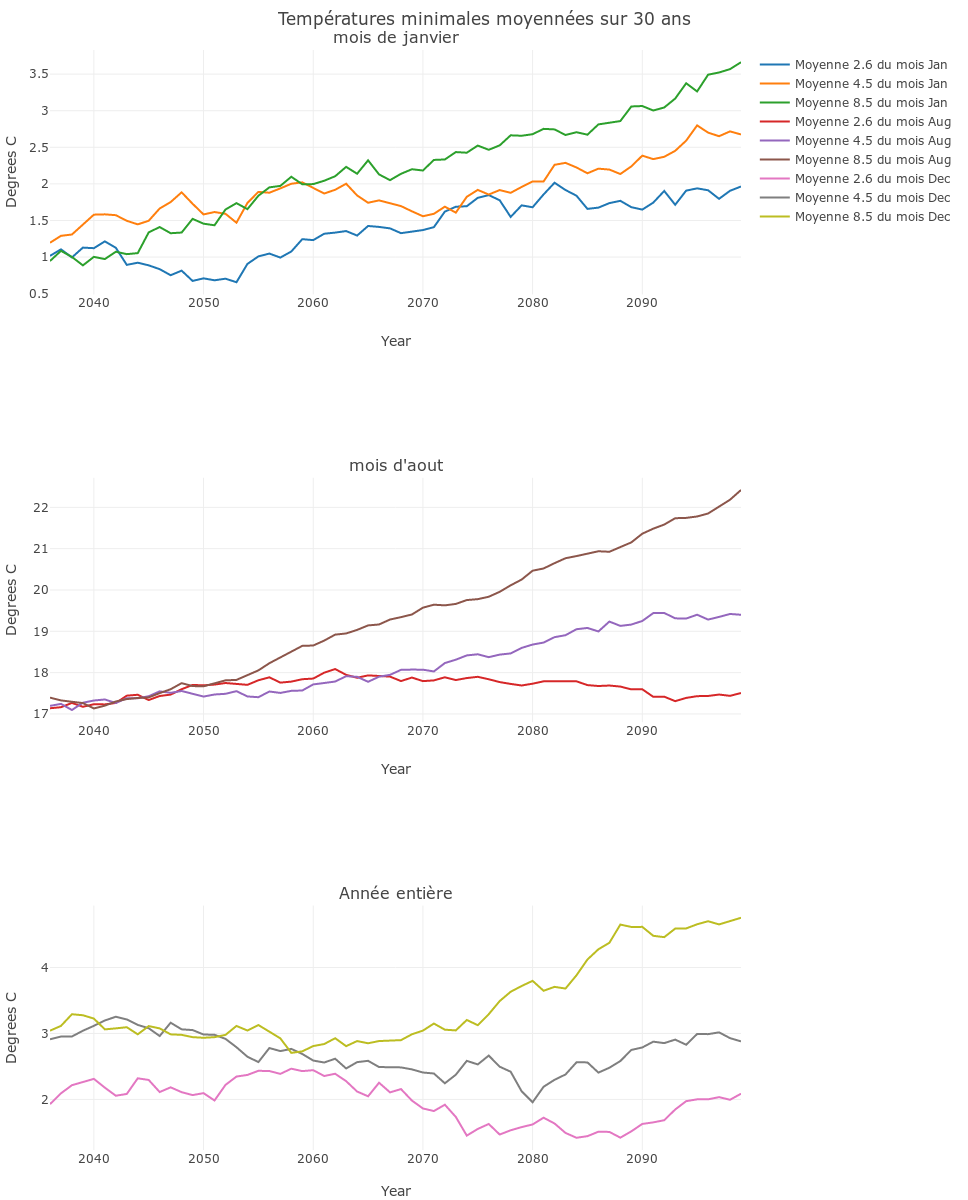

In [71]:
q = 0
trace26_0 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_26[q,:],
    name ='Moyenne 2.6 du mois %s'%lyon_month[calcMonth[q]]
)
trace45_0 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_45[q,:],
    name ='Moyenne 4.5 du mois %s'%lyon_month[calcMonth[q]]
)
trace85_0 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_85[q,:],
    name ='Moyenne 8.5 du mois %s'%lyon_month[calcMonth[q]]
)

q = 1
trace26_1 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_26[q,:],
    name ='Moyenne 2.6 du mois %s'%lyon_month[calcMonth[q]]
)
trace45_1 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_45[q,:],
    name ='Moyenne 4.5 du mois %s'%lyon_month[calcMonth[q]]
)

trace85_1 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_85[q,:],
    name ='Moyenne 8.5 du mois %s'%lyon_month[calcMonth[q]]
)

q = 2
trace26_2 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_26[q,:],
    name ='Moyenne 2.6 du mois %s'%lyon_month[calcMonth[q]]
)
trace45_2 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_45[q,:],
    name ='Moyenne 4.5 du mois %s'%lyon_month[calcMonth[q]]
)

trace85_2 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moymAreaInterval_85[q,:],
    name ='Moyenne 8.5 du mois %s'%lyon_month[calcMonth[q]]
)

fig = tools.make_subplots(rows=3, 
                          cols=1, 
                          subplot_titles=("mois de janvier",
                                          "mois d'aout",
                                          "Année entière"))

fig.append_trace(trace26_0, 1, 1)
fig.append_trace(trace45_0, 1, 1)
fig.append_trace(trace85_0, 1, 1)
fig.append_trace(trace26_1, 2, 1)
fig.append_trace(trace45_1, 2, 1)
fig.append_trace(trace85_1, 2, 1)
fig.append_trace(trace26_2, 3, 1)
fig.append_trace(trace45_2, 3, 1)
fig.append_trace(trace85_2, 3, 1)


fig['layout']['xaxis1'].update(title='Year')
fig['layout']['xaxis2'].update(title='Year')
fig['layout']['xaxis3'].update(title='Year')
fig['layout']['yaxis1'].update(title='Degrees C')
fig['layout']['yaxis2'].update(title='Degrees C')
fig['layout']['yaxis3'].update(title='Degrees C')
fig['layout']['margin'] = {'l': 50, 'r': 10, 'b': 50, 't': 50}
fig['layout'].update(height=1200, width=900, title='Températures minimales moyennées sur 30 ans')

py.iplot(fig, filename='basic-line')

In [72]:
moypAreaInterval_26 = np.zeros((lencalcMonths,yearPeriod))
moypAreaInterval_45 = np.zeros((lencalcMonths,yearPeriod))
moypAreaInterval_85 = np.zeros((lencalcMonths,yearPeriod))
yearPeriodp = yearPeriod - yearInterval
for p in range(yearPeriodp) :
    a = startYear + p
    b = endYear + p    
    moypAreaInterval_26[:,p] = np.mean(lyon_rstr26[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
    moypAreaInterval_45[:,p] = np.mean(lyon_rstr45[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
    moypAreaInterval_85[:,p] = np.mean(lyon_rstr85[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
#print(moyAreaInterval)
firstPlotYear = startYear + yearInterval
lastPlotYear = firstPlotYear + yearPeriodp
data = [] * lencalcMonths
trace = [] * lencalcMonths

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]



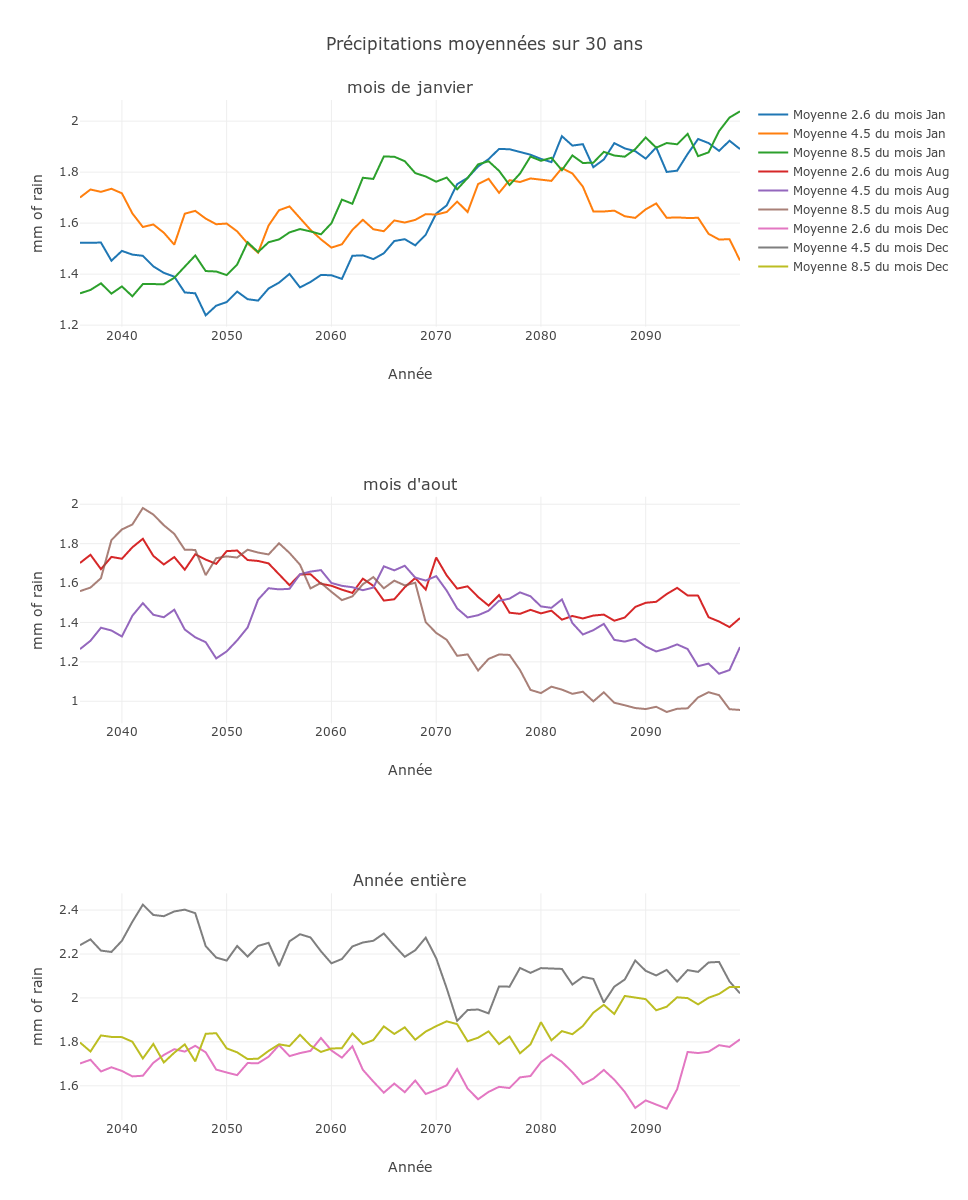

In [73]:
q = 0
trace26_0 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moypAreaInterval_26[q,:],
    name ='Moyenne 2.6 du mois %s'%lyon_month[calcMonth[q]],
)
trace45_0 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moypAreaInterval_45[q,:],
    name ='Moyenne 4.5 du mois %s'%lyon_month[calcMonth[q]],
)
trace85_0 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moypAreaInterval_85[q,:],
    name ='Moyenne 8.5 du mois %s'%lyon_month[calcMonth[q]],
)

q = 1
trace26_1 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moypAreaInterval_26[q,:],
    name ='Moyenne 2.6 du mois %s'%lyon_month[calcMonth[q]],
)
trace45_1 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moypAreaInterval_45[q,:],
    name ='Moyenne 4.5 du mois %s'%lyon_month[calcMonth[q]],
)

trace85_1 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moypAreaInterval_85[q,:],
    name ='Moyenne 8.5 du mois %s'%lyon_month[calcMonth[q]],
    opacity=0.75
)

q = 2
trace26_2 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moypAreaInterval_26[q,:],
    name ='Moyenne 2.6 du mois %s'%lyon_month[calcMonth[q]],
)
trace45_2 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moypAreaInterval_45[q,:],
    name ='Moyenne 4.5 du mois %s'%lyon_month[calcMonth[q]],
)

trace85_2 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moypAreaInterval_85[q,:],
    name ='Moyenne 8.5 du mois %s'%lyon_month[calcMonth[q]],
)

fig = tools.make_subplots(rows=3, 
                          cols=1, 
                          subplot_titles=("mois de janvier",
                                          "mois d'aout",
                                          "Année entière"))

fig.append_trace(trace26_0, 1, 1)
fig.append_trace(trace45_0, 1, 1)
fig.append_trace(trace85_0, 1, 1)
fig.append_trace(trace26_1, 2, 1)
fig.append_trace(trace45_1, 2, 1)
fig.append_trace(trace85_1, 2, 1)
fig.append_trace(trace26_2, 3, 1)
fig.append_trace(trace45_2, 3, 1)
fig.append_trace(trace85_2, 3, 1)

fig['layout']['xaxis1'].update(title='Année')
fig['layout']['xaxis2'].update(title='Année')
fig['layout']['xaxis3'].update(title='Année')
fig['layout']['yaxis1'].update(title='mm of rain')
fig['layout']['yaxis2'].update(title='mm of rain')
fig['layout']['yaxis3'].update(title='mm of rain')
fig['layout'].update(height=1200, width=900, title='Précipitations moyennées sur 30 ans')
#fig['layout']['margin'] = {'l': 50, 'r': 10, 'b': 50, 't': 50}
#fig['layout'].update(title='Température moyenne maximale du mois de juillet', 
#                     autosize=False, width=800, height=380)  

py.iplot(fig, filename='basic-line')

In [74]:
moycAreaInterval_26 = np.zeros((lencalcMonths,yearPeriod))
moycAreaInterval_45 = np.zeros((lencalcMonths,yearPeriod))
moycAreaInterval_85 = np.zeros((lencalcMonths,yearPeriod))
yearPeriodp = yearPeriod - yearInterval
for p in range(yearPeriodp) :
    a = startYear + p
    b = endYear + p    
    moycAreaInterval_26[:,p] = np.mean(lyon_rstrc26[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
    moycAreaInterval_45[:,p] = np.mean(lyon_rstrc45[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
    moycAreaInterval_85[:,p] = np.mean(lyon_rstrc85[a:b,calcMonth,startj:endj,starti:endi],axis=(0,2,3)) 
#print(moyAreaInterval)
firstPlotYear = startYear + yearInterval
lastPlotYear = firstPlotYear + yearPeriodp
data = [] * lencalcMonths
trace = [] * lencalcMonths

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]



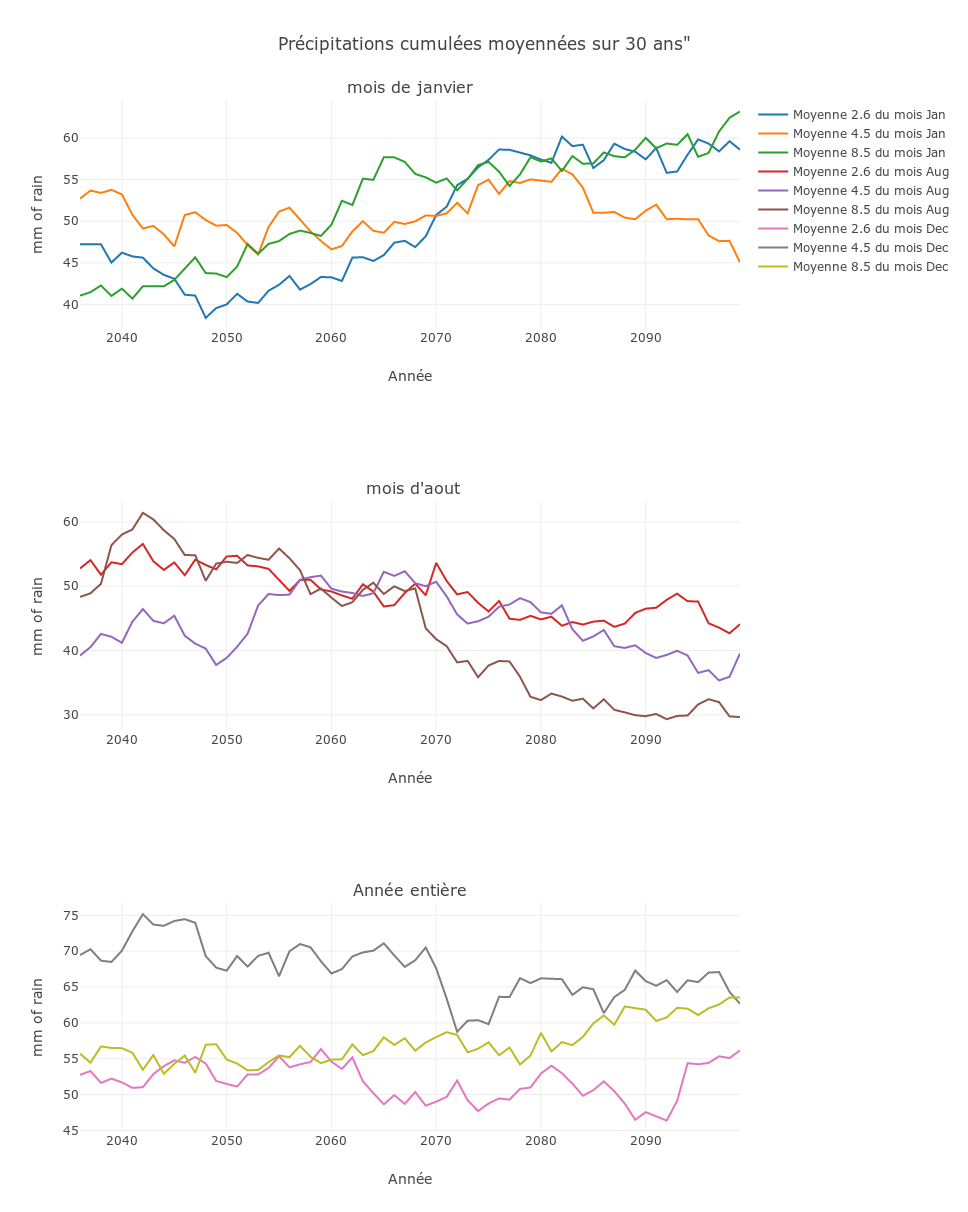

In [75]:
q = 0
trace26_0 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moycAreaInterval_26[q,:],
    name ='Moyenne 2.6 du mois %s'%lyon_month[calcMonth[q]],
)
trace45_0 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moycAreaInterval_45[q,:],
    name ='Moyenne 4.5 du mois %s'%lyon_month[calcMonth[q]],
)
trace85_0 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moycAreaInterval_85[q,:],
    name ='Moyenne 8.5 du mois %s'%lyon_month[calcMonth[q]],
)

q = 1
trace26_1 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moycAreaInterval_26[q,:],
    name ='Moyenne 2.6 du mois %s'%lyon_month[calcMonth[q]],
    xaxis='x2',
    yaxis='y2'

)
trace45_1 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moycAreaInterval_45[q,:],
    name ='Moyenne 4.5 du mois %s'%lyon_month[calcMonth[q]],
    xaxis='x2',
    yaxis='y2'
)

trace85_1 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moycAreaInterval_85[q,:],
    name ='Moyenne 8.5 du mois %s'%lyon_month[calcMonth[q]],    
    xaxis='x2',
    yaxis='y2'
)

q = 2
trace26_2 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moycAreaInterval_26[q,:],
    name ='Moyenne 2.6 du mois %s'%lyon_month[calcMonth[q]],
    xaxis='x2',
    yaxis='y2'

)
trace45_2 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moycAreaInterval_45[q,:],
    name ='Moyenne 4.5 du mois %s'%lyon_month[calcMonth[q]],
    xaxis='x2',
    yaxis='y2'
)

trace85_2 = go.Scatter(
    x = lyon_year[firstPlotYear:lastPlotYear],
    y = moycAreaInterval_85[q,:],
    name ='Moyenne 8.5 du mois %s'%lyon_month[calcMonth[q]],    
    xaxis='x2',
    yaxis='y2'
)

fig = tools.make_subplots(rows=3, 
                          cols=1,
                          subplot_titles=("mois de janvier",
                                          " mois d'aout",
                                          "Année entière")
)

fig.append_trace(trace26_0, 1, 1)
fig.append_trace(trace45_0, 1, 1)
fig.append_trace(trace85_0, 1, 1)
fig.append_trace(trace26_1, 2, 1)
fig.append_trace(trace45_1, 2, 1)
fig.append_trace(trace85_1, 2, 1)
fig.append_trace(trace26_2, 3, 1)
fig.append_trace(trace45_2, 3, 1)
fig.append_trace(trace85_2, 3, 1)
fig['layout']['xaxis1'].update(title='Année')
fig['layout']['xaxis2'].update(title='Année')
fig['layout']['xaxis3'].update(title='Année')
fig['layout']['yaxis1'].update(title='mm of rain')
fig['layout']['yaxis2'].update(title='mm of rain')
fig['layout']['yaxis3'].update(title='mm of rain')
fig['layout'].update(height=1200, width=1000, title='Précipitations cumulées moyennées sur 30 ans"')

py.iplot(fig, filename='basic-line')

### Contrôle du contenu du fichier sauvegardé 
Ce bloc permet d'imprimer le contenu du jeu de données qui vient d'être sauvegardé afin de vérifier qu'il contient les données attendues. le suivant ferme le fichier écrit.

In [76]:
#for dim in extractLyonTempYearMonth.dimensions.items():
#    print(dim[1])
#for var in extractLyonTempYearMonth.variables.keys() :
#    print (var, '\t\t', extractLyonTempYearMonth.variables[var].dimensions, '\t\t', 
#           extractLyonTempYearMonth.variables[var].shape, '\t', extractLyonTempYearMonth.variables[var].dtype)